# Amazon/Rakuten/Yahooの商品情報収集バッチスクリプトの監視ダッシュボード

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import pymysql

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,4
rcParams['figure.dpi'] = 200

In [4]:
try:
    conn = pymysql.connect(host='hostname', user='username', passwd='password', db='dbname', charset='utf8')
    cur = conn.cursor(pymysql.cursors.DictCursor)
except:
    print("Unexpected DB connect Error:", sys.exc_info()[0])

0

## Yahooの商品情報からAmazonの商品が何品検索できたかのヒストグラムと期待値

EXPECT:  2.57612241267


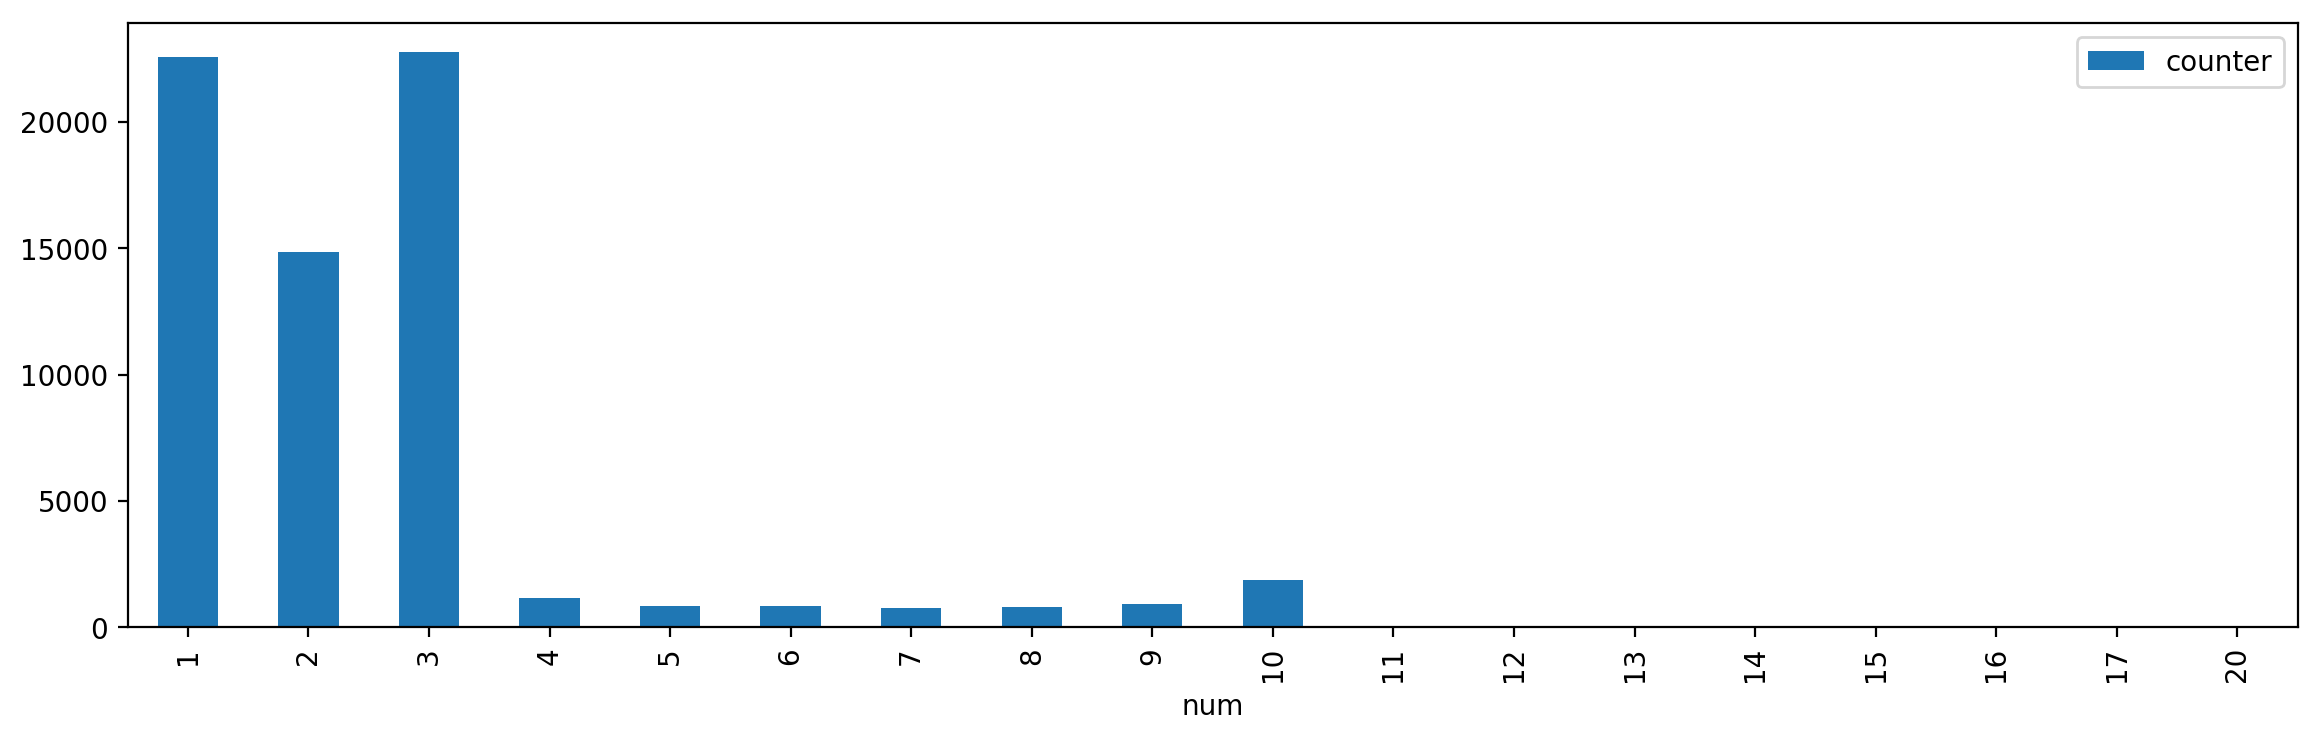

In [5]:
dfyahooIC = pd.read_sql_query("SELECT num, COUNT(*) AS counter FROM (SELECT yahooItemCode, COUNT(*) AS num FROM itemDetails WHERE yahooItemCode IS NOT NULL GROUP BY yahooItemCode) AS table1 GROUP BY num", conn)
expectation = 0
for row in range(0, len(dfyahooIC.index)):
    expectation += (dfyahooIC['num'][row]*dfyahooIC['counter'][row])/(dfyahooIC.sum()['counter'])
print("EXPECT: ", expectation)
dfyahooIC.plot.bar(x=['num'], y=['counter'])

## 楽天の商品情報からAmazonの商品が何品検索できたかのヒストグラムと期待値

EXPECT:  2.27654224355


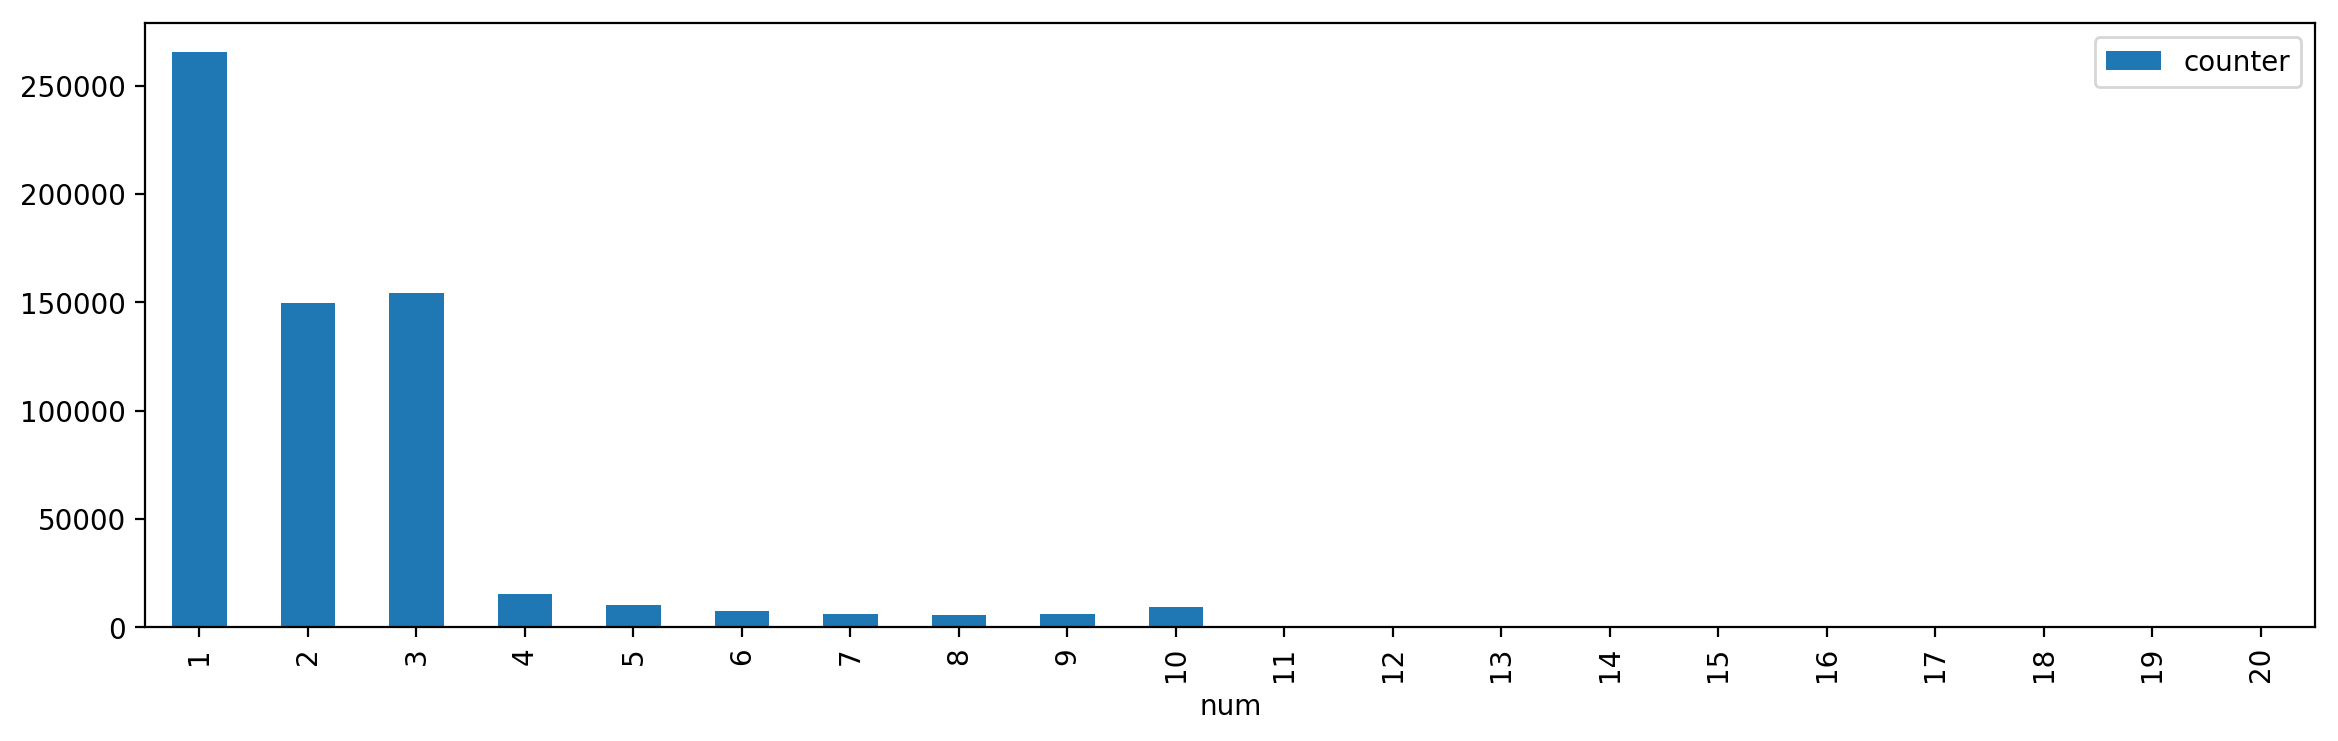

In [6]:
dfrakutenIC = pd.read_sql_query("SELECT num, COUNT(*) AS counter FROM (SELECT rakutenItemCode, COUNT(*) AS num FROM itemDetails WHERE rakutenItemCode IS NOT NULL GROUP BY rakutenItemCode) AS table1 GROUP BY num", conn)
expectation = 0
for row in range(0, len(dfrakutenIC.index)):
    expectation += (dfrakutenIC['num'][row]*dfrakutenIC['counter'][row])/(dfrakutenIC.sum()['counter'])
print("EXPECT: ", expectation)
dfrakutenIC.plot.bar(x=['num'], y=['counter'])

## Yahoo商品検索キーワード情報からAmazonの商品が何品検索できたかのヒストグラムと期待値

EXPECT:  4.93263045846


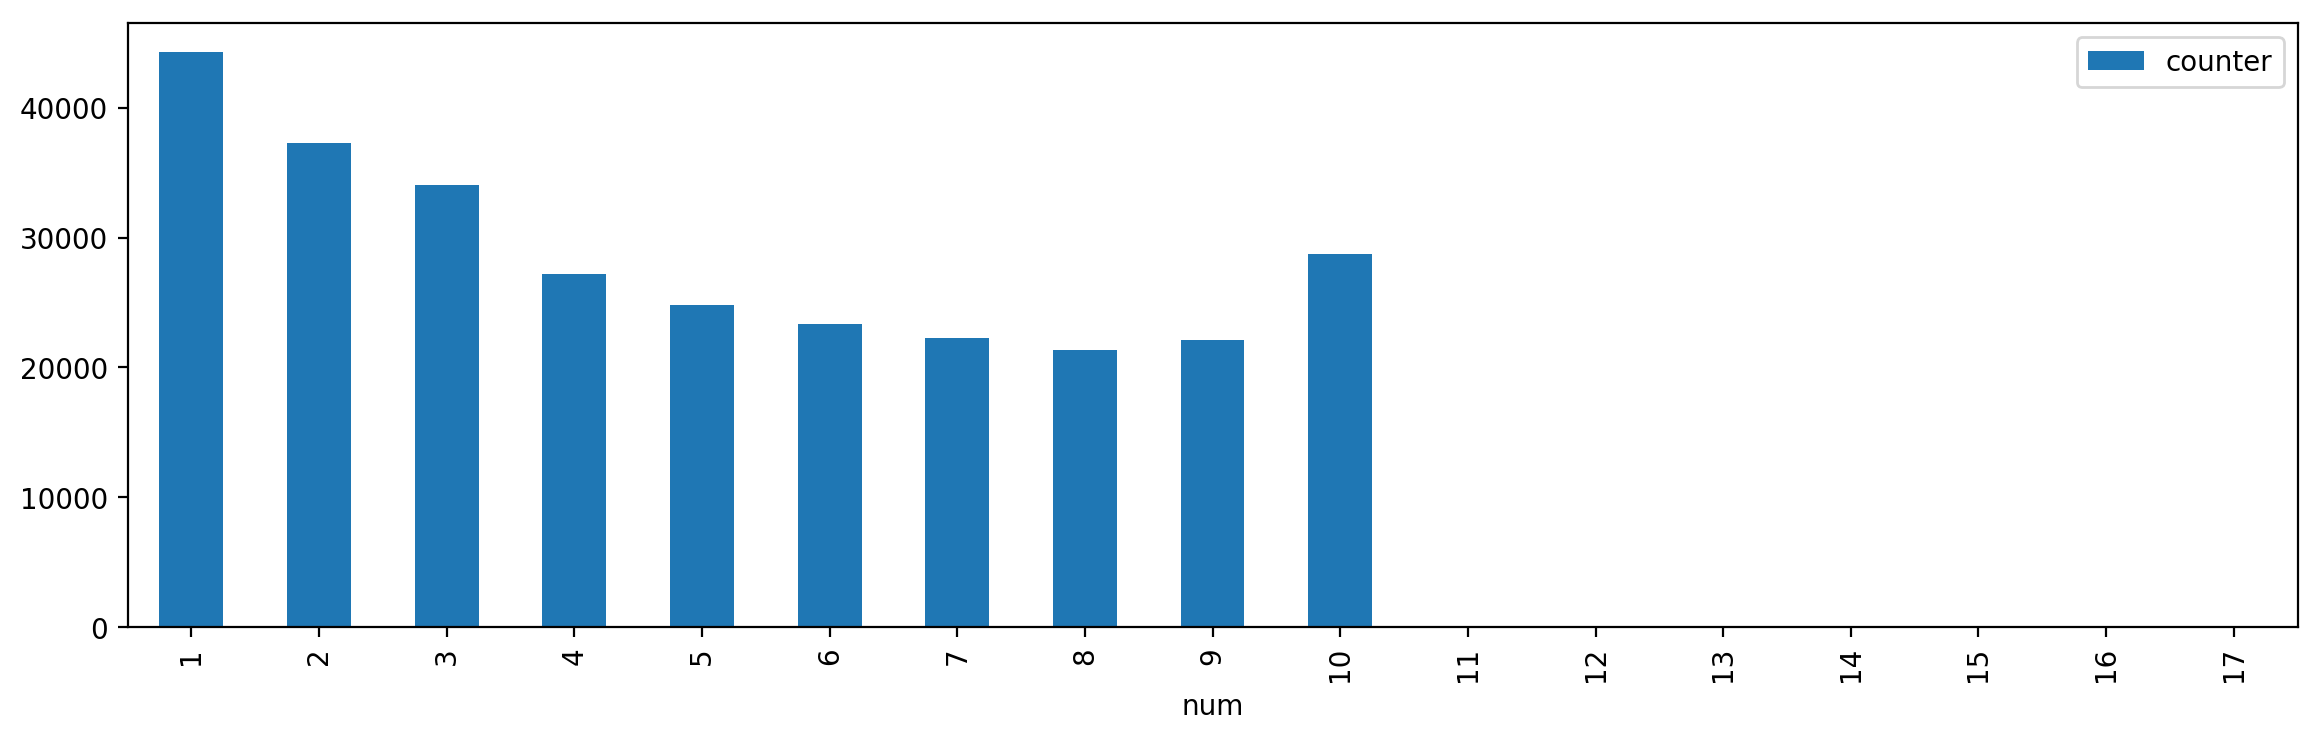

In [7]:
dfyahooKW = pd.read_sql_query("SELECT num, COUNT(*) AS counter FROM (SELECT yahooKeyword, COUNT(*) AS num FROM itemDetails WHERE yahooKeyword IS NOT NULL GROUP BY yahooKeyword) AS table1 GROUP BY num", conn)
expectation = 0
for row in range(0, len(dfyahooKW.index)):
    expectation += (dfyahooKW['num'][row]*dfyahooKW['counter'][row])/(dfyahooKW.sum()['counter'])
print("EXPECT: ", expectation)
dfyahooKW.plot.bar(x=['num'], y=['counter'])

## DBのレコード数表示

In [8]:
df = pd.read_sql_query("SELECT * FROM DBrecordNum", conn)
df.head(5)

,tableName,recordNum,got_time
0,DBrecordNum,0,2017-12-10 19:19:04
1,allBrowseNodes,3197,2017-12-10 19:19:04
2,allBrowseNodesCSV,14885,2017-12-10 19:19:04
3,amaranSearchCandidates,2544,2017-12-10 19:19:04
4,amaranSearchItems,254200,2017-12-10 19:19:04


## DBレコード数の時系列グラフ

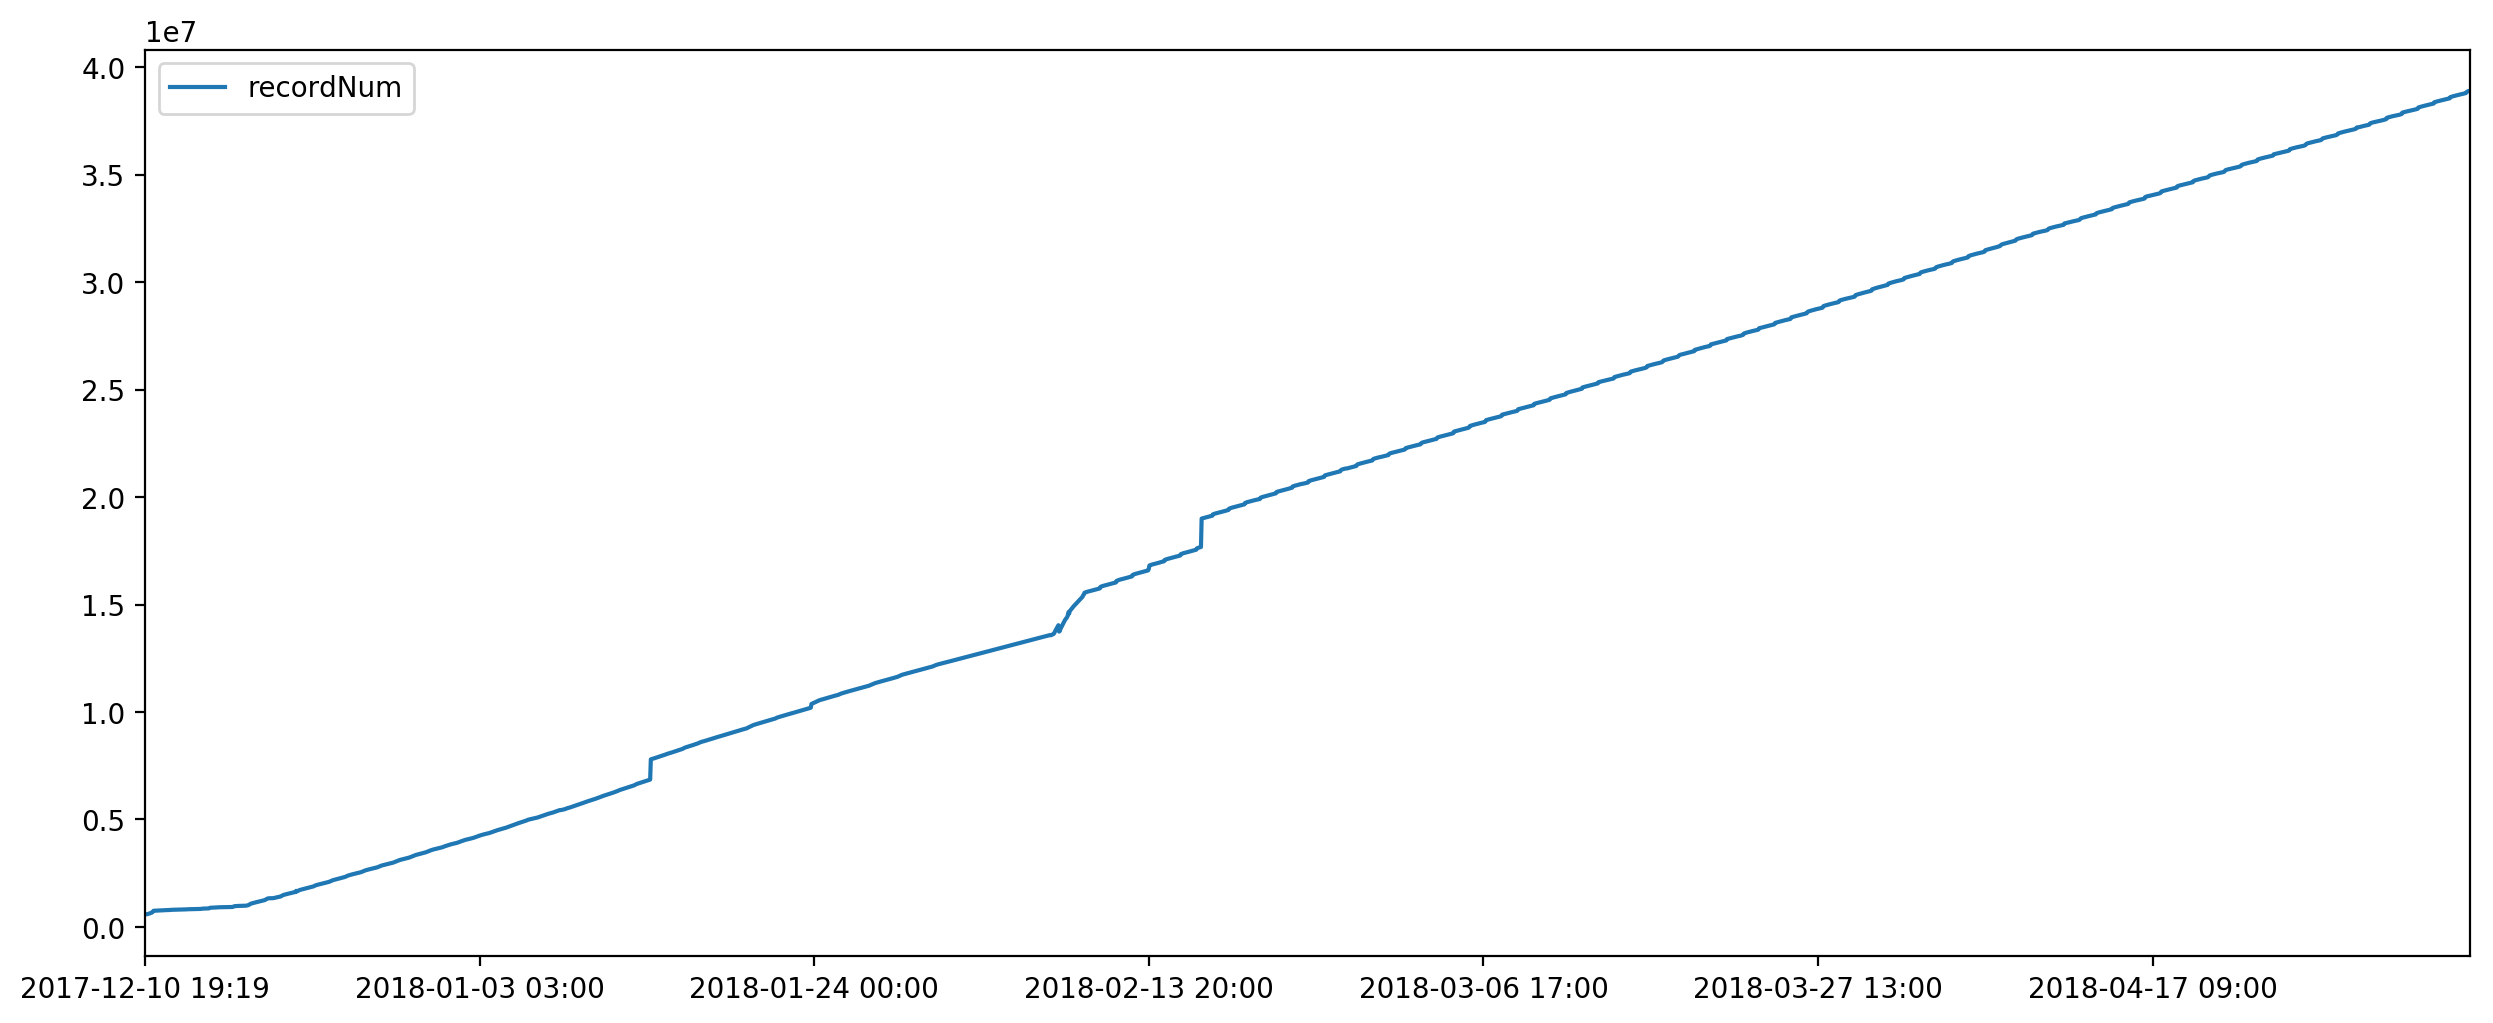

In [9]:
dfg = df.pivot_table(values=['recordNum'], index=['got_time'], aggfunc='sum')
# import datetime
dfg.index=pd.to_datetime(dfg.index).strftime("%Y-%m-%d %H:%M")
dfg.plot(figsize=(15,6))

## 各DBのレコード数最新15件表示

In [10]:
dfp = df.pivot(index='got_time', columns='tableName', values='recordNum')
dfp.index=pd.to_datetime(dfp.index).strftime("%Y-%m-%d %H:%M")
dfp.tail(15)

tableName,DBrecordNum,DBrecordNum_copy,allBrowseNodes,allBrowseNodesCSV,amaranSearchCandidates,amaranSearchItems,amazonRanking,amazonSellEstimate,bestSellerBigCategory,bestSellerItems,...,rakutenGenre_copy,rakutenItems,rakutenItems_copy,rakutenItems_copy_copy,searchCandidates,testSQLtable,yahooCtg,yahooItemSearch,yahooKeyword,yahooSuddenRiseItems
2018-05-06 13:00,114288.0,NaN,3197.0,14885.0,3072.0,256700.0,24701167.0,8849.0,33.0,7543.0,...,NaN,194931.0,1188607.0,327056.0,1170.0,3.0,7978.0,33611.0,396163.0,269033.0
2018-05-06 14:00,114323.0,NaN,3197.0,14885.0,3072.0,256700.0,24708285.0,8849.0,33.0,7543.0,...,NaN,194931.0,1188607.0,327056.0,1170.0,3.0,7978.0,33611.0,396163.0,269033.0
2018-05-06 15:00,114358.0,NaN,3197.0,14885.0,3072.0,256700.0,24714429.0,8849.0,33.0,7543.0,...,NaN,194931.0,1188607.0,327056.0,1170.0,3.0,7978.0,33611.0,396163.0,269033.0
2018-05-06 16:00,114393.0,NaN,3197.0,14885.0,3072.0,256700.0,24721574.0,8849.0,33.0,7543.0,...,NaN,194931.0,1188607.0,327056.0,1170.0,3.0,7978.0,33611.0,396163.0,269033.0
2018-05-06 17:00,114428.0,NaN,3197.0,14885.0,3072.0,256700.0,24727731.0,8849.0,33.0,7543.0,...,NaN,194931.0,1188607.0,327056.0,1170.0,3.0,7978.0,33611.0,396163.0,269033.0
2018-05-06 18:00,114463.0,NaN,3197.0,14885.0,3072.0,256700.0,24734866.0,8849.0,33.0,7543.0,...,NaN,194931.0,1188607.0,327056.0,1170.0,3.0,7978.0,33611.0,396163.0,269033.0
2018-05-06 19:00,114498.0,NaN,3197.0,14885.0,3072.0,256700.0,24741033.0,8849.0,33.0,7543.0,...,NaN,194931.0,1188607.0,327056.0,1170.0,3.0,7978.0,33611.0,396682.0,271000.0
2018-05-06 20:00,114533.0,NaN,3197.0,14885.0,3072.0,256700.0,24749974.0,8849.0,33.0,7543.0,...,NaN,194931.0,1188607.0,327056.0,1170.0,3.0,7978.0,33611.0,397890.0,271000.0
2018-05-06 21:00,114568.0,NaN,3197.0,14885.0,3072.0,256700.0,24756226.0,8849.0,33.0,7543.0,...,NaN,194931.0,1188607.0,327056.0,1170.0,3.0,7978.0,33611.0,399170.0,271000.0
2018-05-06 22:00,114603.0,NaN,3197.0,14885.0,3072.0,256700.0,24766554.0,8849.0,33.0,7543.0,...,NaN,194931.0,1192506.0,327056.0,1170.0,3.0,7978.0,33611.0,399470.0,271000.0


## Amazon/楽天/Yahoo商品レコード、Yahoo商品情報キーワードの取得数推移

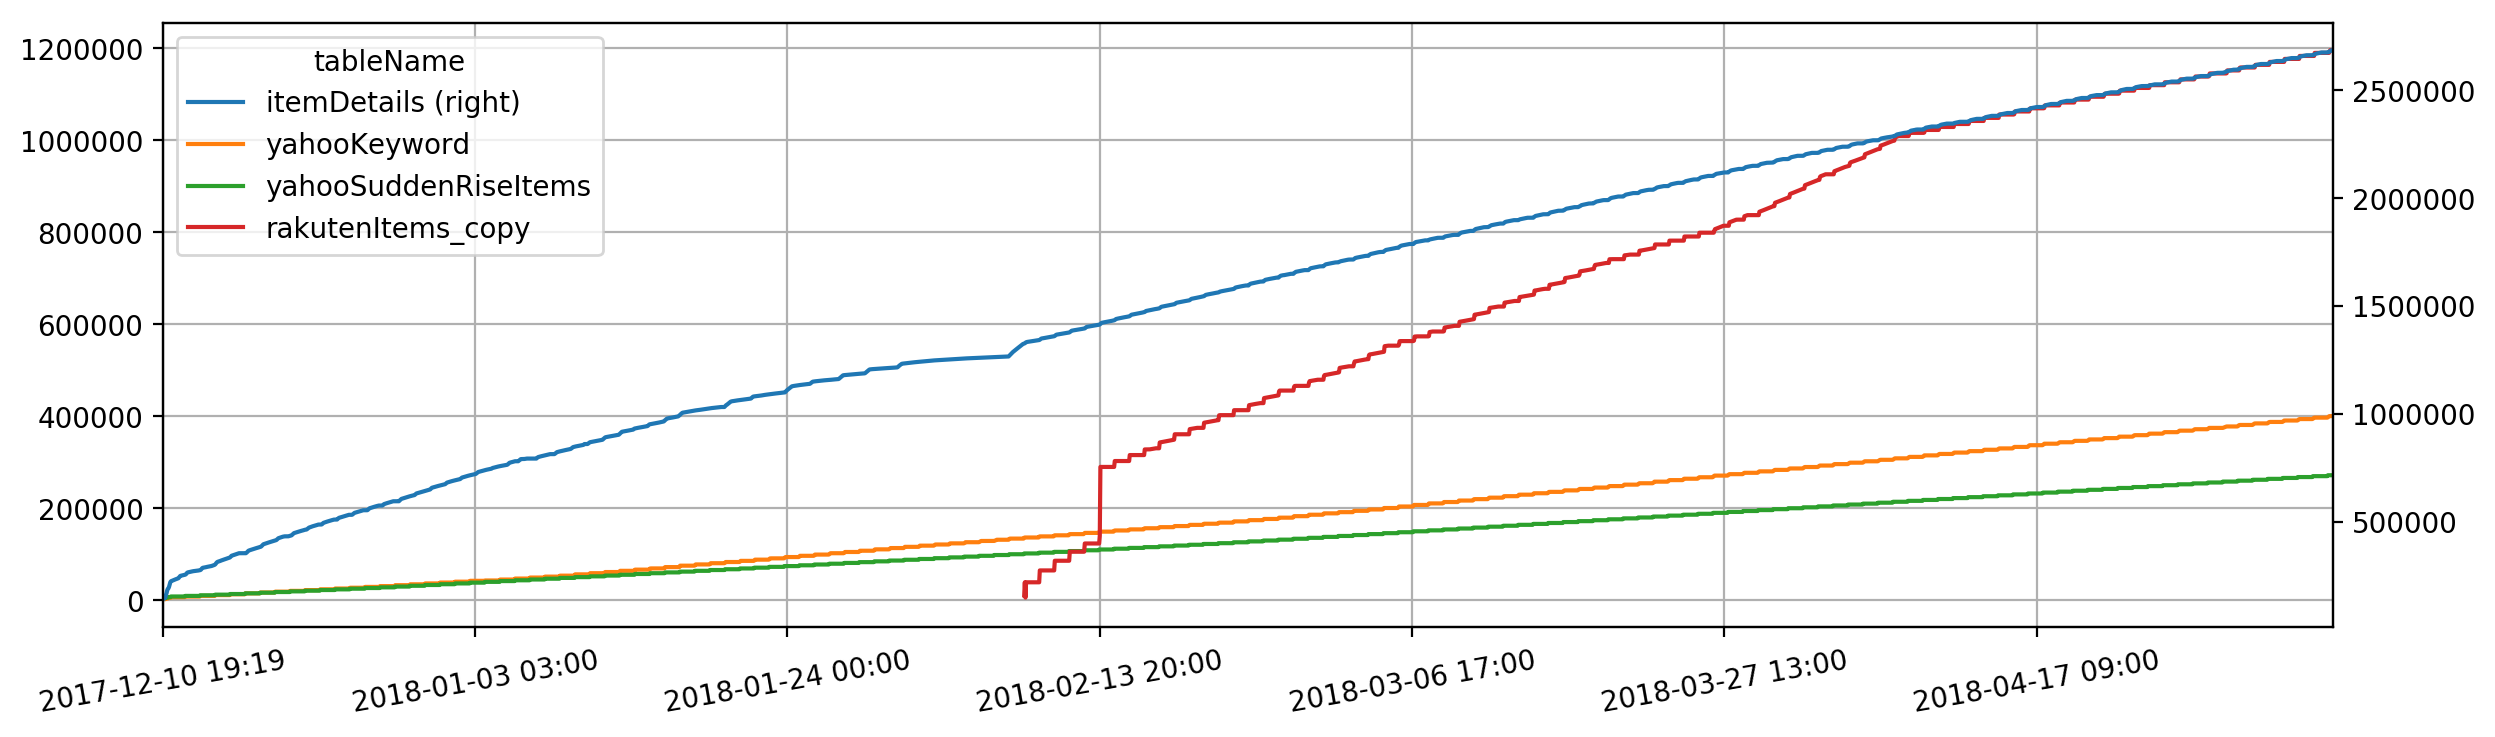

In [11]:
dfpy = dfp[['itemDetails', 'yahooKeyword','yahooSuddenRiseItems','rakutenItems_copy']].interpolate(method='linear')
dfpy.plot(grid=True, secondary_y=['itemDetails'], rot=10)

## 待ち検索クエリ数とAmazon商品レコード数推移

In [13]:
dfq = pd.read_sql_query("SELECT * FROM queryNum", conn)
dfq.index=dfq.got_time.dt.strftime("%Y-%m-%d %H:%M")
dfmerge = dfpy[['itemDetails']].join(dfq['queryNum'], how='outer')
dfmerge.tail(5)

,itemDetails,queryNum
2018-05-06 23:00,2679148.0,7205.0
2018-05-07 00:00,2681035.0,6486.0
2018-05-07 01:00,2682365.0,5766.0
2018-05-07 02:00,2682996.0,5044.0
2018-05-07 03:00,2683636.0,4325.0


## 待ち検索クエリ数とAmazon商品レコード数推移詳細

In [14]:
dfmergeM = dfmerge.assign(
   queryIncrease = dfmerge['queryNum'].diff()
).assign(
    itemIncrease = dfmerge['itemDetails'].diff()
).assign(
    itemIncSum = dfmerge['itemDetails']-dfmerge['itemDetails'].shift(periods=24)
).assign(
    itemIncEstPerDay = dfmerge['itemDetails'].diff()*24
)
dfmergeM.tail(24)

,itemDetails,queryNum,queryIncrease,itemIncrease,itemIncSum,itemIncEstPerDay
2018-05-06 04:00,2669364.0,3257.0,-721.0,560.0,12658.0,13440.0
2018-05-06 05:00,2670110.0,2536.0,-721.0,746.0,12773.0,17904.0
2018-05-06 06:00,2670841.0,1815.0,-721.0,731.0,12831.0,17544.0
2018-05-06 07:00,2671590.0,1091.0,-724.0,749.0,12888.0,17976.0
2018-05-06 08:00,2672227.0,373.0,-718.0,637.0,12917.0,15288.0
2018-05-06 09:00,2672559.0,6.0,-367.0,332.0,12929.0,7968.0
2018-05-06 10:00,2672572.0,0.0,-6.0,13.0,12897.0,312.0
2018-05-06 11:00,2672572.0,0.0,0.0,0.0,12897.0,0.0
2018-05-06 12:00,2672572.0,0.0,0.0,0.0,12897.0,0.0
2018-05-06 13:00,2672572.0,0.0,0.0,0.0,12897.0,0.0


## 待ち検索クエリ数とAmazon商品レコード数推移グラフ

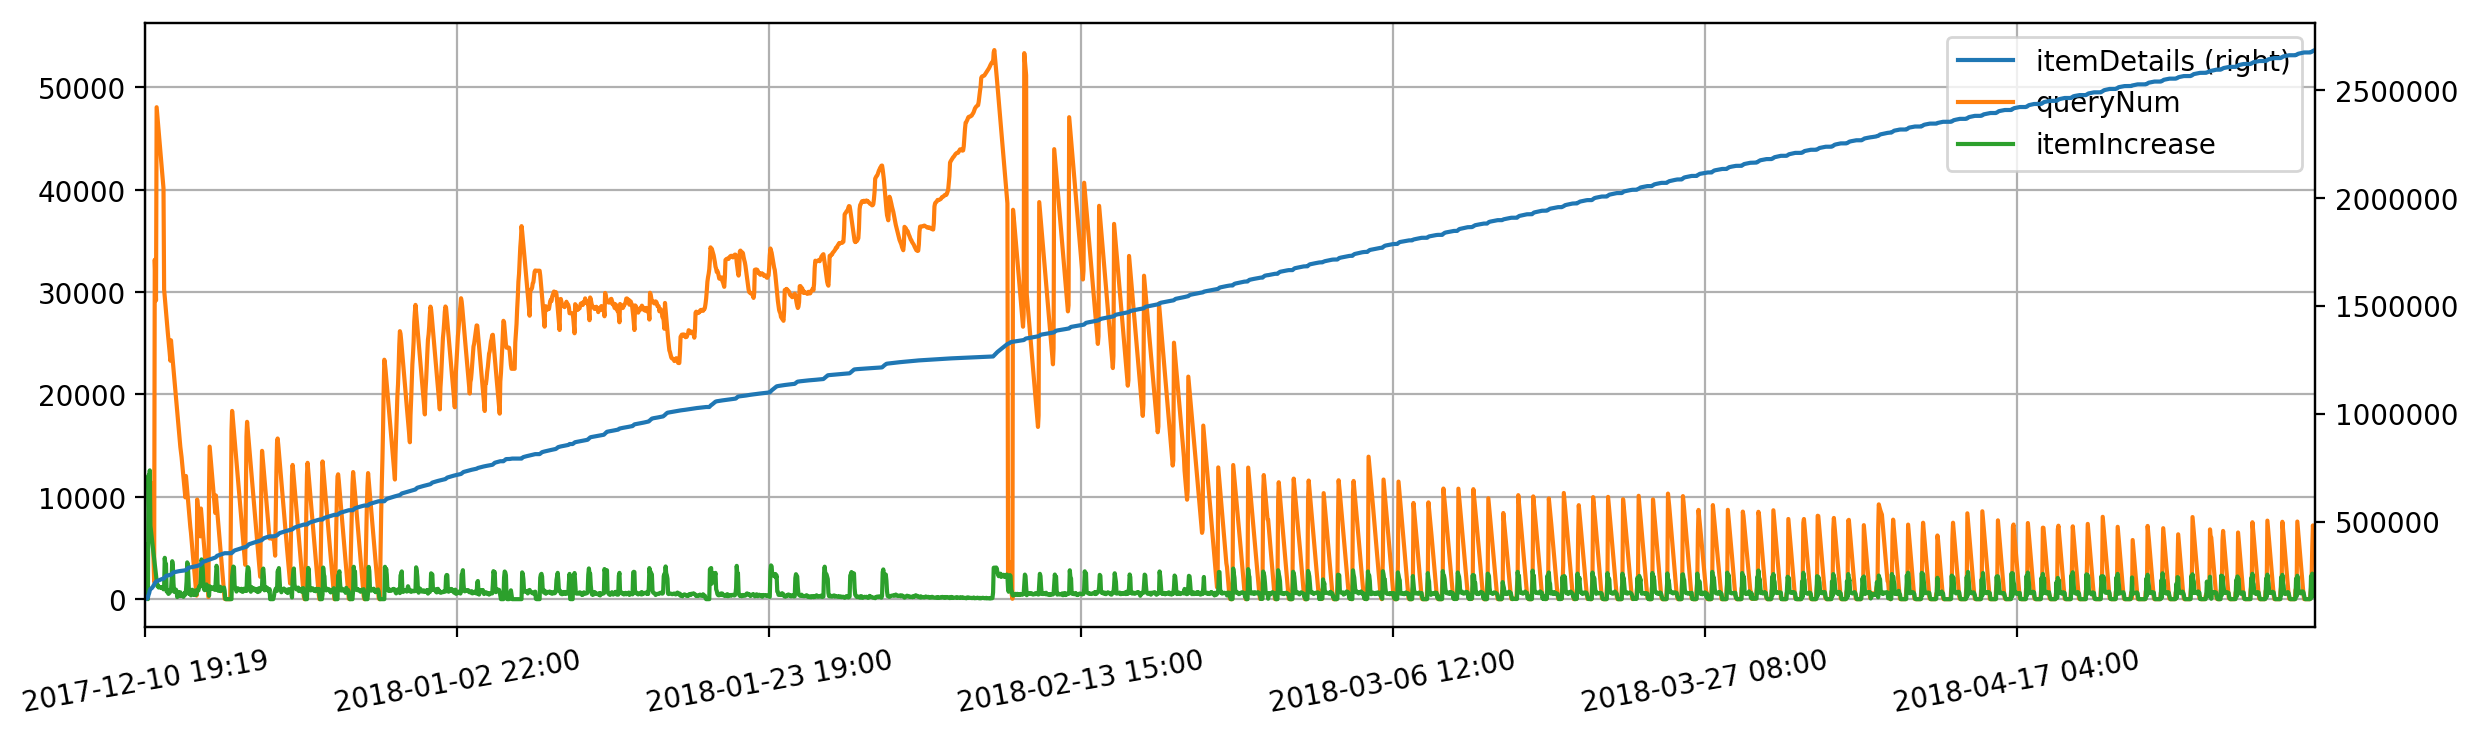

In [15]:
dfmergex = dfmergeM.interpolate(method='linear')
dfmergex[['itemDetails', 'queryNum', 'itemIncrease']]['2017-01-06 22:00:00':].plot(grid=True, secondary_y=['itemDetails'], rot=10, legend='best')

## 現在の待ち検索クエリ数内訳と検索終了予定時間

In [16]:
dfQuery = pd.read_sql_query("SELECT * FROM listMatchingProductsSQL WHERE check_target=\"check\" ORDER BY priority ASC", conn)
querySum = 0
for row in range(0, len(dfQuery.index)):
    sql = dfQuery['sql'][row]
    dfQueryResult = pd.read_sql_query(sql, conn)
    querySum += len(dfQueryResult.index)
    print(dfQuery['prefix'][row], dfQuery['targetTable'][row], ": ", len(dfQueryResult.index))
print("\nTotal: ", querySum, "  ==> Finish query in ", round(querySum/720), "hour")

【YKW】 yahooKeyword :  0
【YQ1】 yahooKeyword :  0
【YQ2】 yahooKeyword :  1
【YQ3】 yahooKeyword :  0
None manualQuery :  0
None yahooSuddenRiseItems :  0
None yahooItemSearch :  0
None rakutenItems_copy :  4192

Total:  4193   ==> Finish query in  6 hour


In [20]:
cur.close()
conn.close()